<a href="https://colab.research.google.com/github/ashirm1999/Web-Traffic-Time-Series-Forecasting/blob/main/Master_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download web-traffic-time-series-forecasting

 95% 63.0M/66.0M [00:00<00:00, 84.5MB/s]
100% 66.0M/66.0M [00:00<00:00, 104MB/s] 
 82% 56.0M/68.2M [00:00<00:00, 78.6MB/s]
100% 68.2M/68.2M [00:00<00:00, 139MB/s] 
 96% 97.0M/101M [00:01<00:00, 82.0MB/s]
100% 101M/101M [00:01<00:00, 86.7MB/s] 
 85% 82.0M/96.0M [00:01<00:00, 57.5MB/s]
100% 96.0M/96.0M [00:01<00:00, 86.1MB/s]
 99% 149M/150M [00:01<00:00, 74.9MB/s]
100% 150M/150M [00:01<00:00, 79.5MB/s]
 97% 99.0M/102M [00:02<00:00, 41.0MB/s]
100% 102M/102M [00:02<00:00, 48.3MB/s] 


In [ ]:
! unzip key_1.csv.zip
! unzip key_2.csv.zip
! unzip train_1.csv.zip
! unzip train_2.csv.zip

Archive:  key_1.csv.zip
  inflating: key_1.csv               
Archive:  key_2.csv.zip
  inflating: key_2.csv               
Archive:  train_1.csv.zip
  inflating: train_1.csv             
Archive:  train_2.csv.zip
  inflating: train_2.csv             


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train_1.csv')
df2 = pd.read_csv('/content/train_2.csv')

In [ ]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

In [ ]:
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [ ]:
train_flattened.reset_index(drop=False,inplace=True)
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day

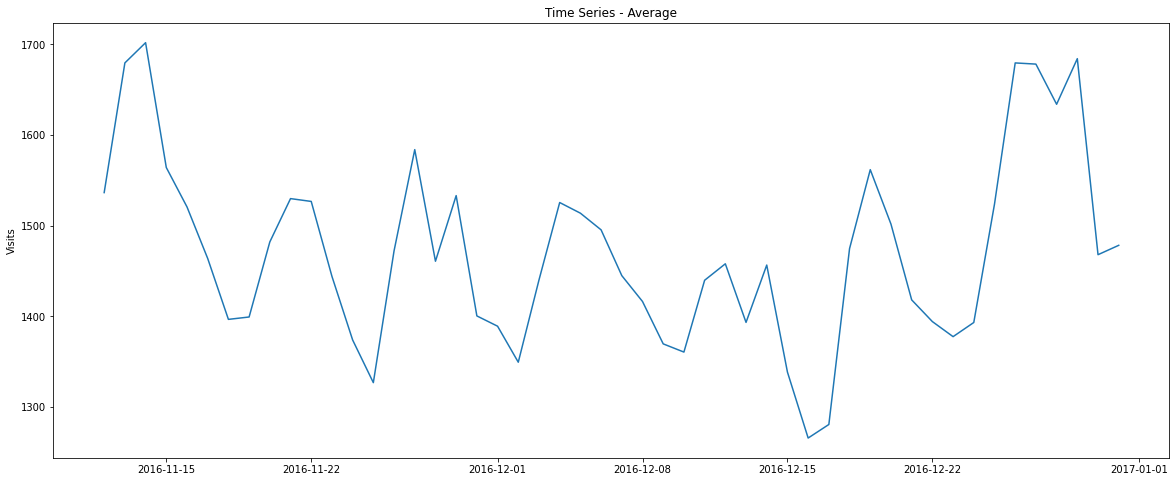

In [ ]:
plt.figure(figsize=(20, 8))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.ylabel("Visits")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


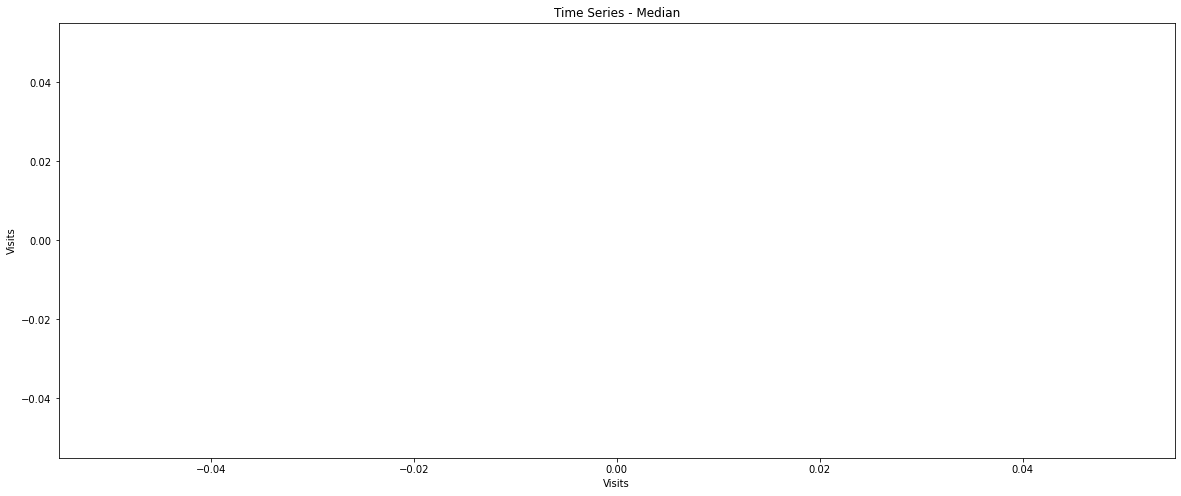

In [ ]:
plt.figure(figsize=(20, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()

sns.lineplot(y = median_group, color = 'r')
plt.title('Time Series - Median')
plt.ylabel("Visits")
plt.show()

In [ ]:
median_group

date
2016-11-12    167.0
2016-11-13    182.0
2016-11-14    168.0
2016-11-15    163.5
2016-11-16    163.0
2016-11-17    160.0
2016-11-18    157.0
2016-11-19    166.0
2016-11-20    180.0
2016-11-21    165.0
2016-11-22    161.0
2016-11-23    162.0
2016-11-24    153.0
2016-11-25    151.0
2016-11-26    161.0
2016-11-27    181.0
2016-11-28    161.0
2016-11-29    160.0
2016-11-30    157.0
2016-12-01    153.0
2016-12-02    154.0
2016-12-03    157.0
2016-12-04    176.0
2016-12-05    163.0
2016-12-06    160.0
2016-12-07    158.0
2016-12-08    156.0
2016-12-09    153.0
2016-12-10    156.0
2016-12-11    172.0
2016-12-12    162.0
2016-12-13    159.0
2016-12-14    156.0
2016-12-15    150.0
2016-12-16    146.0
2016-12-17    150.0
2016-12-18    166.0
2016-12-19    161.0
2016-12-20    155.0
2016-12-21    151.0
2016-12-22    149.0
2016-12-23    143.0
2016-12-24    132.0
2016-12-25    145.0
2016-12-26    160.0
2016-12-27    162.0
2016-12-28    163.0
2016-12-29    160.0
2016-12-30    154.0
2016-12-31    1

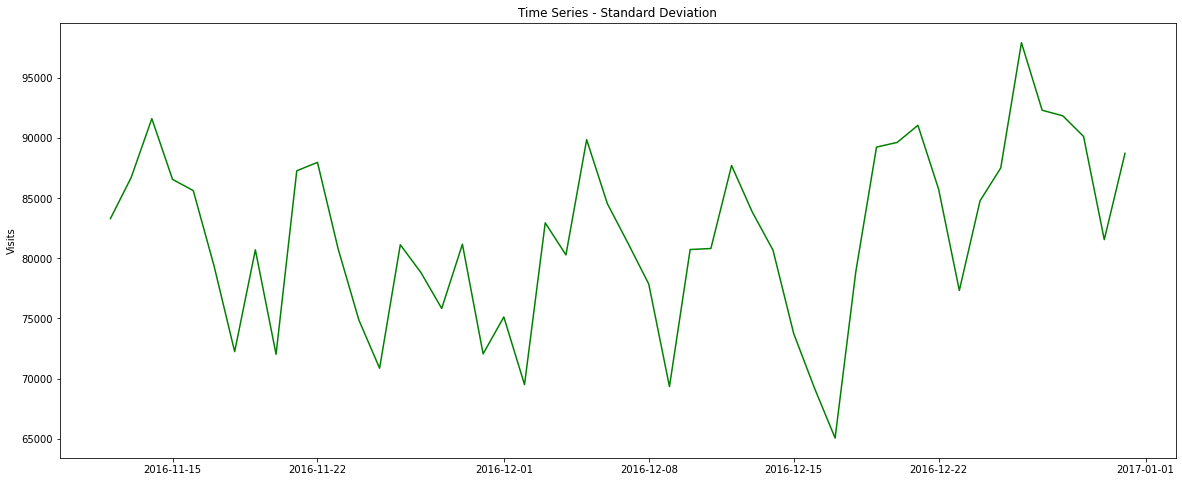

In [ ]:
plt.figure(figsize=(20, 8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - Standard Deviation')
plt.ylabel("Visits")
plt.show()

In [ ]:
df1 = df1.T

In [ ]:
df1 = df1.reset_index()

In [ ]:
df1.columns = df1.iloc[0,:].values

In [ ]:
df1 = df1.drop(0, axis = 0)

In [ ]:
df1 = df1.rename(columns = {"Page" : "Date"})

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"])

In [ ]:
#df1["Date"] = df1.set_index("Date")

In [ ]:
df1

,Date,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,ASTRO_zh.wikipedia.org_all-access_spider,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_spider,All_your_base_are_belong_to_us_zh.wikipedia.org_all-access_spider,AlphaGo_zh.wikipedia.org_all-access_spider,Android_zh.wikipedia.org_all-access_spider,Angelababy_zh.wikipedia.org_all-access_spider,Apink_zh.wikipedia.org_all-access_spider,Apple_II_zh.wikipedia.org_all-access_spider,As_One_zh.wikipedia.org_all-access_spider,B-PROJECT_zh.wikipedia.org_all-access_spider,B1A4_zh.wikipedia.org_all-access_spider,BDSM_zh.wikipedia.org_all-access_spider,BEAST_zh.wikipedia.org_all-access_spider,BIGBANG_zh.wikipedia.org_all-access_spider,BLACK_PINK_zh.wikipedia.org_all-access_spider,BLEACH_zh.wikipedia.org_all-access_spider,BTOB_zh.wikipedia.org_all-access_spider,Beautiful_Mind_zh.wikipedia.org_all-access_spider,Beyond_zh.wikipedia.org_all-access_spider,Big_zh.wikipedia.org_all-access_spider,Block_B_zh.wikipedia.org_all-access_spider,CHAOS;CHILD_zh.wikipedia.org_all-access_spider,CHAOS;HEAD_zh.wikipedia.org_all-access_spider,CLC_zh.wikipedia.org_all-access_spider,CNBLUE_zh.wikipedia.org_all-access_spider,DIA_zh.wikipedia.org_all-access_spider,Daigo_zh.wikipedia.org_all-access_spider,Dear_My_Friends_zh.wikipedia.org_all-access_spider,Doctors_zh.wikipedia.org_all-access_spider,...,La_niña_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Capitán_América:_Civil_war_es.wikipedia.org_all-access_spider,Wikipedia:Wikiconcurso/Desafíos_de_edición_WMAR_Mayo_2016_es.wikipedia.org_all-access_spider,Región_andina_(Colombia)_es.wikipedia.org_all-access_spider,Anexo:Medallero_histórico_de_los_Juegos_Olímpicos_es.wikipedia.org_all-access_spider,Chavín_(cultura)_es.wikipedia.org_all-access_spider,Winifer_Fernández_es.wikipedia.org_all-access_spider,Cazafantasmas_(película_de_2016)_es.wikipedia.org_all-access_spider,Anexo:Tenis_en_los_Juegos_Olímpicos_de_Río_de_Janeiro_2016_es.wikipedia.org_all-access_spider,Un_monstruo_viene_a_verme_(película)_es.wikipedia.org_all-access_spider,Sin_senos_sí_hay_paraíso_es.wikipedia.org_all-access_spider,Anexo:Medallero_de_los_Juegos_Olímpicos_de_Río_de_Janeiro_2016_es.wikipedia.org_all-access_spider,Arrival_(película)_es.wikipedia.org_all-access_spider,Anexo:Baloncesto_en_los_Juegos_Olímpicos_de_Río_de_Janeiro_2016_es.wikipedia.org_all-access_spider,Hasta_que_te_conocí_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Westworld_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Milénico_es.wikipedia.org_all-access_spider,Moonlight_(película)_es.wikipedia.org_all-access_spider,Sully_(película)_es.wikipedia.org_all-access_spider,Pulsaciones_(serie_de_televisión)_es.wikipedia.org_all-access_spider,2091_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Campeonato_Sudamericano_de_Fútbol_Sub-20_de_2017_es.wikipedia.org_all-access_spider,Split_(película)_es.wikipedia.org_all-access_spider,Huracán_Matthew_es.wikipedia.org_all-access_spider,Fences_(película)_es.wikipedia.org_all-access_spider,Logan_(película)_es.wikipedia.org_all-access_spider,La_doña_(telenovela_de_2016)_es.wikipedia.org_all-access_spider,RTS_(canal_de_televisión)_es.wikipedia.org_all-access_spider,La_ley_del_corazón_es.wikipedia.org_all-access_spider,The_Crown_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)

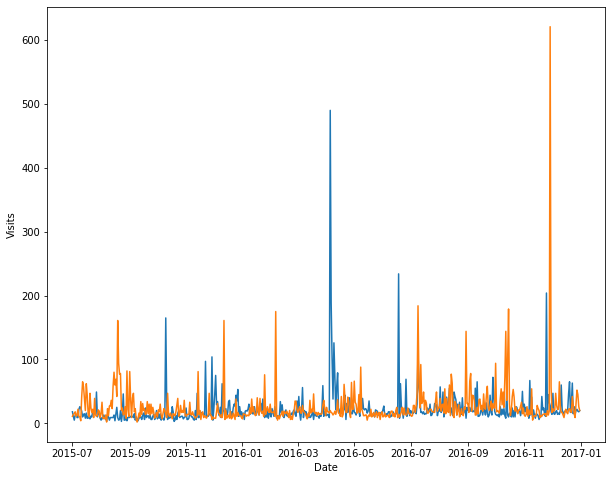

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(x = "Date", y = "2NE1_zh.wikipedia.org_all-access_spider", data = df1)
sns.lineplot(x = "Date", y = "2PM_zh.wikipedia.org_all-access_spider", data = df1)
plt.ylabel("Visits")
plt.show()